Available github public repositories:
1. GCN pytorch==1.0, python==3.7
2. GIN pytorch==1.6, python==3.7.3
3. GAT pytorch==1.7, python==3.8

Hence, we set the virtual environment (pytorch==1.8, python==3.8):
### Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main\
_openmp_mutex             5.1                       1_gnu\
aiohappyeyeballs          2.4.4                    pypi_0    pypi\
aiohttp                   3.10.11                  pypi_0    pypi\
aiosignal                 1.3.1                    pypi_0    pypi\
async-timeout             5.0.1                    pypi_0    pypi\
attrs                     25.3.0                   pypi_0    pypi\
ca-certificates           2025.2.25            h06a4308_0\
certifi                   2025.1.31                pypi_0    pypi\
charset-normalizer        3.4.1                    pypi_0    pypi
dataclasses               0.6                      pypi_0    pypi
frozenlist                1.5.0                    pypi_0    pypi
fsspec                    2025.3.0                 pypi_0    pypi
future                    1.0.0                    pypi_0    pypi
googledrivedownloader     1.1.0                    pypi_0    pypi
idna                      3.10                     pypi_0    pypi
isodate                   0.7.2                    pypi_0    pypi
jinja2                    3.1.6                    pypi_0    pypi
joblib                    1.4.2                    pypi_0    pypi
ld_impl_linux-64          2.40                 h12ee557_0
libffi                    3.4.4                h6a678d5_1
libgcc-ng                 11.2.0               h1234567_1
libgomp                   11.2.0               h1234567_1
libstdcxx-ng              11.2.0               h1234567_1
markupsafe                2.1.5                    pypi_0    pypi
multidict                 6.1.0                    pypi_0    pypi
ncurses                   6.4                  h6a678d5_0
networkx                  3.1                      pypi_0    pypi
openssl                   3.0.16               h5eee18b_0
pandas                    2.0.3                    pypi_0    pypi
pillow                    10.4.0                   pypi_0    pypi
pip                       24.2             py38h06a4308_0
propcache                 0.2.0                    pypi_0    pypi
psutil                    7.0.0                    pypi_0    pypi
python                    3.8.20               he870216_0
python-dateutil           2.9.0.post0              pypi_0    pypi
pytz                      2025.1                   pypi_0    pypi
pyyaml                    6.0.2                    pypi_0    pypi
rdflib                    7.1.3                    pypi_0    pypi
readline                  8.2                  h5eee18b_0
requests                  2.32.3                   pypi_0    pypi
scikit-learn              1.3.2                    pypi_0    pypi
scipy                     1.10.1                   pypi_0    pypi
setuptools                75.1.0           py38h06a4308_0
six                       1.17.0                   pypi_0    pypi
sqlite                    3.45.3               h5eee18b_0
threadpoolctl             3.5.0                    pypi_0    pypi
tk                        8.6.14               h39e8969_0
torch                     1.8.0                    pypi_0    pypi
torch-cluster             1.5.9                    pypi_0    pypi
torch-geometric           2.0.0                    pypi_0    pypi
torch-scatter             2.0.7                    pypi_0    pypi
torch-sparse              0.6.10                   pypi_0    pypi
torch-spline-conv         1.2.1                    pypi_0    pypi
torchaudio                0.8.0                    pypi_0    pypi
torchvision               0.9.0                    pypi_0    pypi
tqdm                      4.67.1                   pypi_0    pypi
typing-extensions         4.12.2                   pypi_0    pypi
tzdata                    2025.1                   pypi_0    pypi
urllib3                   2.2.3                    pypi_0    pypi
wheel                     0.44.0           py38h06a4308_0
xz                        5.6.4                h5eee18b_1
yacs                      0.1.8                    pypi_0    pypi
yarl                      1.15.2                   pypi_0    pypi
zlib                      1.2.13               h5eee18b_1

Notably, the torch-geometric==2.0 torch-cluster==1.5.9 torch-scatter==2.0.7 torch-sparse==0.6.10 torch-spline-conv==1.2.1

dataset cora, citeseer, pubmed download with torch_geometric.datasets.Planetoid
url = 
Data preprocess and fixed splitted (48%/32%/20%) on dataset cora, citeseer, pubmed

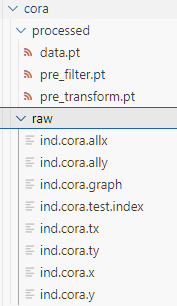

# load data manually with original .npz file

dataset chameleon, squirrel, crocodile download with torch_geometric.datasets.WikipediaNetwork
original .npz file: url = 'https://graphmining.ai/datasets/ptg/wiki'

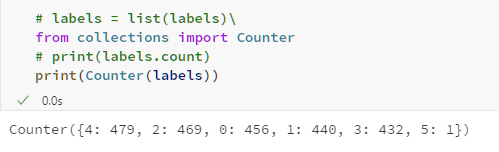 chameleon with 1 case in class 5

In [ ]:
import numpy as np
import torch
import os
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
# from torch_geometric.utils import subgraph

def load_heterophilous_dataset(name, data_dir='/data/Data2/jianghai/dataset'):
    # ... [previous loading code] ...
    raw_data = np.load(os.path.join(data_dir, f'{name}.npz'))
    
    data = Data(
        x=torch.tensor(raw_data['features'], dtype=torch.float),
        edge_index=torch.tensor(raw_data['edges'].T, dtype=torch.long),
        y=torch.tensor(raw_data['label'], dtype=torch.long)
    )  # Original data creation
    
    # Add class removal here
    if name == 'chameleon':
        class_to_remove = 5
        mask = data.y != class_to_remove
        data = data.subgraph(mask)
    
    # Continue with splitting
    indices = np.arange(data.num_nodes)
    labels = data.y.numpy()
    
    # Stratified splitting (48% train, 32% val, 20% test)
    # First split: train (48%) vs temp (52%)
    train_idx, temp_idx = train_test_split(
        indices,
        train_size=0.48,
        stratify=labels,
        random_state=42
    )
    
    # Second split: val (32% of total) and test (20% of total)
    val_idx, test_idx = train_test_split(
        temp_idx,
        test_size=0.3846,  # 0.20 / 0.52 ≈ 0.3846
        stratify=labels[temp_idx],
        random_state=42
    )
    
    # Create mask tensors
    data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
    data.train_mask[train_idx] = True

    data.val_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
    data.val_mask[val_idx] = True

    data.test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
    data.test_mask[test_idx] = True
    
    return data

def remove_class_and_clean(data, class_to_remove):
    # Create mask for nodes to keep
    keep_mask = data.y != class_to_remove
    
    # Filter nodes and edges using subgraph
    filtered_data = data.subgraph(keep_mask)
    
    # Re-map remaining class labels if needed (optional)
    # filtered_data.y = torch.unique(filtered_data.y, return_inverse=True)[1]
    
    return filtered_data

# Load original dataset (using previous loading code)
chameleon_data = load_heterophilous_dataset('chameleon')
squirrel_data = load_heterophilous_dataset('squirrel')

# Before removal stats
print("Chameleon dataset:")
print(f"Nodes: {chameleon_data.num_nodes}")
print(f"Edges: {chameleon_data.edge_index.shape[1]}")
print("Class distribution:", torch.bincount(chameleon_data.y))

print("Squirrel dataset:")
print(f"Nodes: {squirrel_data.num_nodes}")
print(f"Edges: {squirrel_data.edge_index.shape[1]}")
print("Class distribution:", torch.bincount(squirrel_data.y))

# Remove class 5 nodes
# class_to_remove = 5
# filtered_data = remove_class_and_clean(chameleon_data, class_to_remove)

# # After removal stats
# print("\nFiltered dataset:")
# print(f"Nodes: {filtered_data.num_nodes}")
# print(f"Edges: {filtered_data.edge_index.shape[1]}")
# print("Remaining classes:", torch.unique(filtered_data.y))
# print("New class distribution:", torch.bincount(filtered_data.y))

# # Verify splits after removal
# print("\nUpdated splits:")
# print(f"Train: {filtered_data.train_mask.sum().item()} nodes")
# print(f"Val: {filtered_data.val_mask.sum().item()} nodes")
# print(f"Test: {filtered_data.test_mask.sum().item()} nodes")

In [ ]:
import os
import requests
import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.data import Data
from torch_geometric.transforms import NormalizeFeatures

root = '/data/Data2/jianghai/dataset'
cora = Planetoid(root=root, name='cora'.capitalize(), split='random', 
                 transform=NormalizeFeatures(), 
                 num_train_per_class=107, num_val=499, num_test=312)

citeseer = Planetoid(root=root, name='citeseer'.capitalize(), split='random', 
                     transform=NormalizeFeatures(), 
                     num_train_per_class=129, num_val=518, num_test=324)

pubmed = Planetoid(root=root, name='Pubmed'.capitalize(), split='random', 
                   transform=NormalizeFeatures(), 
                   num_train_per_class=250, num_val=499, num_test=312)

def process_data(data):
    # Convert to undirected graph (if not already)
    data.edge_index = torch.cat([data.edge_index, data.edge_index.flip(0)], dim=1)
    
    # Remove duplicate edges
    data.edge_index = torch.unique(data.edge_index, dim=1)
    
    # Add self-loops
    data.edge_index = add_self_loops(data.edge_index)
    
    return data

def add_self_loops(edge_index, num_nodes=None):
    if num_nodes is None:
        num_nodes = edge_index.max().item() + 1
    loop_index = torch.arange(0, num_nodes, dtype=torch.long).view(1, -1).repeat(2, 1)
    return torch.cat([edge_index, loop_index], dim=1)

def print_stats(dataset):
    data = dataset[0]
    data = process_data(data)
    print(f"\n{dataset.name} Dataset:")
    print("="*40)
    print(f"Total nodes: {data.num_nodes}")
    print(f"Edges (directed): {data.edge_index.shape[1]//2}")
    print(f"Features per node: {data.num_features}")
    print(f"Classes: {dataset.num_classes}")
    print(f"Training nodes: {data.train_mask.sum().item()}")
    print(f"Validation nodes: {data.val_mask.sum().item()}")
    print(f"Test nodes: {data.test_mask.sum().item()}")
    print(f"Class distribution:\n{torch.bincount(data.y)}")
    print(f"Average node degree: {data.edge_index.shape[1] // data.num_nodes:.2f}")
    print(f"Contains self-loops: {data.edge_index[0] == data.edge_index[1]}.any()")
    print(f"Is undirected: {data.is_undirected()}")
    
print_stats(cora)
print_stats(citeseer)
print_stats(pubmed)

In [2]:
import torch
import torch.nn.functional as F
import random
import os
import numpy as np
from torch_geometric.datasets import Planetoid
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GINConv, GATConv
from torch_geometric.transforms import NormalizeFeatures
from torch.nn import Linear, ModuleList, Sequential, ReLU, BatchNorm1d
from torch.optim import Adam
from sklearn.model_selection import train_test_split

# Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 200
lr = 0.01
weight_decay = 5e-4
hidden_dim = 64
dropout = 0.5

# Random Seed
def seed_torch(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

# Load dataset ['cora', 'citeseer', 'Pubmed']
def load_dataset(name):
    root = '/data/Data2/jianghai/dataset'
    if name == 'cora':
        cora = Planetoid(root=root, name='cora'.capitalize(), split='random', 
                        transform=NormalizeFeatures(), 
                        num_train_per_class=107, num_val=499, num_test=312)
        return cora
    elif name == 'citeseer':
        citeseer = Planetoid(root=root, name='citeseer'.capitalize(), split='random', 
                            transform=NormalizeFeatures(), 
                            num_train_per_class=129, num_val=518, num_test=324)
        return citeseer
    elif name == 'pubmed':
        pubmed = Planetoid(root=root, name='Pubmed'.capitalize(), split='random', 
                        transform=NormalizeFeatures(), 
                        num_train_per_class=250, num_val=499, num_test=312)
        return pubmed
    else:
        print('Dataset do not exists!')



# Model definitions
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)
        self.dropout = dropout

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

class GIN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        self.mlp1 = Sequential(
            Linear(num_features, hidden_dim),
            BatchNorm1d(hidden_dim),
            ReLU(),
            Linear(hidden_dim, hidden_dim)
        )
        self.conv1 = GINConv(self.mlp1)
        
        self.mlp2 = Sequential(
            Linear(hidden_dim, hidden_dim),
            BatchNorm1d(hidden_dim),
            ReLU(),
            Linear(hidden_dim, num_classes)
        )
        self.conv2 = GINConv(self.mlp2)
        self.dropout = dropout

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

class GAT(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        self.conv1 = GATConv(
            num_features, 
            hidden_dim, 
            heads=8, 
            dropout=dropout
        )
        self.conv2 = GATConv(
            hidden_dim * 8, 
            num_classes, 
            heads=1, 
            concat=False,
            dropout=dropout
        )
        self.dropout = dropout

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Training and evaluation
def train(model, data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def test(model, data):
    model.eval()
    out = model(data)
    pred = out.argmax(dim=1)
    
    accs = []
    for mask in [data.train_mask, data.val_mask, data.test_mask]:
        acc = (pred[mask] == data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs

def run_experiment(dataset_name, model_type):
    # Load data
    if dataset_name in ['cora', 'citeseer', 'pubmed']:
        dataset = load_dataset(dataset_name)
    else:
        dataset = load_heterophilous_dataset(dataset_name)
    data = dataset[0].to(device)
    
    # Initialize model
    if model_type == 'gcn':
        model = GCN(dataset.num_features, dataset.num_classes).to(device)
    elif model_type == 'gin':
        model = GIN(dataset.num_features, dataset.num_classes).to(device)
    elif model_type == 'gat':
        model = GAT(dataset.num_features, dataset.num_classes).to(device)
    else:
        raise ValueError("Invalid model type")
    
    global optimizer
    optimizer = Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    best_val_acc = 0
    best_test_acc = 0
    
    for epoch in range(1, epochs+1):
        loss = train(model, data)
        train_acc, val_acc, test_acc = test(model, data)
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_test_acc = test_acc
            
        if epoch % 50 == 0:
            print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
                  f'Train: {train_acc:.4f}, Val: {val_acc:.4f}, '
                  f'Test: {test_acc:.4f}')
    
    print(f'\nBest validation accuracy: {best_val_acc:.4f}')
    print(f'Corresponding test accuracy: {best_test_acc:.4f}')
    return best_test_acc

# Run experiments
if __name__ == "__main__":
    seed_torch(42)
    datasets = ['cora', 'citeseer', 'pubmed']
    models = ['gcn', 'gin', 'gat']
    
    results = {}
    for dataset in datasets:
        results[dataset] = {}
        for model in models:
            print(f'\n{"-"*40}')
            print(f'Training {model.upper()} on {dataset.capitalize()}')
            print(f'{"-"*40}')
            test_acc = run_experiment(dataset, model)
            results[dataset][model] = test_acc
    
    # Print final results
    print('\nFinal Results:')
    for dataset in datasets:
        print(f'\n{dataset.capitalize()}:')
        for model in models:
            print(f'{model.upper()}: {results[dataset][model]:.4f}')


----------------------------------------
Training GCN on Cora
----------------------------------------


/home/jianghai/.conda/envs/UL/lib/python3.9/site-packages/torch_geometric/io/fs.py:229: UserWarning: Weights only load failed. Please file an issue to make `torch.load(weights_only=True)` compatible in your case. Please use `torch.serialization.add_safe_globals([GlobalStorage])` to allowlist this global.
  warnings.warn(f"{warn_msg} Please use "


Epoch: 050, Loss: 0.7514, Train: 0.9105, Val: 0.8236, Test: 0.8077
Epoch: 100, Loss: 0.4648, Train: 0.9199, Val: 0.8236, Test: 0.8237
Epoch: 150, Loss: 0.3802, Train: 0.9252, Val: 0.8257, Test: 0.8301
Epoch: 200, Loss: 0.3606, Train: 0.9426, Val: 0.8196, Test: 0.8301

Best validation accuracy: 0.8357
Corresponding test accuracy: 0.8365

----------------------------------------
Training GIN on Cora
----------------------------------------
Epoch: 050, Loss: 0.0191, Train: 0.9973, Val: 0.7395, Test: 0.7276
Epoch: 100, Loss: 0.0208, Train: 0.9987, Val: 0.7114, Test: 0.6891
Epoch: 150, Loss: 0.0115, Train: 0.9987, Val: 0.7154, Test: 0.6891
Epoch: 200, Loss: 0.0079, Train: 0.9987, Val: 0.7234, Test: 0.7083

Best validation accuracy: 0.8036
Corresponding test accuracy: 0.7628

----------------------------------------
Training GAT on Cora
----------------------------------------
Epoch: 050, Loss: 0.7098, Train: 0.9306, Val: 0.8397, Test: 0.8397
Epoch: 100, Loss: 0.5927, Train: 0.9479, Val: 0.8

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GINConv, GATConv
from torch.nn import Linear, Sequential, ReLU, BatchNorm1d
from sklearn.model_selection import train_test_split
import requests

# Configuration
device = torch.device('cuda:0')
epochs = 500
lr = 0.005
weight_decay = 5e-5
hidden_dim = 128
dropout = 0.6
heads = 8

# Load dataset ['chameleon', 'squirrel']
def load_heterophilous_dataset(name):
    data_dir='/data/Data2/jianghai/dataset'
    raw_data = np.load(os.path.join(data_dir, f'{name}.npz'))
    
    data = Data(
        x=torch.tensor(raw_data['features'], dtype=torch.float),
        edge_index=torch.tensor(raw_data['edges'].T, dtype=torch.long),
        y=torch.tensor(raw_data['label'], dtype=torch.long)
    )  # Original data creation
    
    # Add class removal here
    if name == 'chameleon':
        class_to_remove = 5
        mask = data.y != class_to_remove
        data = data.subgraph(mask)
    
    # Continue with splitting
    indices = np.arange(data.num_nodes)
    labels = data.y.numpy()
    
    # Stratified splitting (48% train, 32% val, 20% test)
    # First split: train (48%) vs temp (52%)
    train_idx, temp_idx = train_test_split(
        indices,
        train_size=0.48,
        stratify=labels,
        random_state=42
    )
    
    # Second split: val (32% of total) and test (20% of total)
    val_idx, test_idx = train_test_split(
        temp_idx,
        test_size=0.3846,  # 0.20 / 0.52 ≈ 0.3846
        stratify=labels[temp_idx],
        random_state=42
    )
    
    # Create mask tensors
    data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
    data.train_mask[train_idx] = True

    data.val_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
    data.val_mask[val_idx] = True

    data.test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
    data.test_mask[test_idx] = True
    
    return data

# Model Definitions
class GCNHet(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, num_classes)
        self.dropout = dropout

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

class GINHet(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        self.mlp1 = Sequential(
            Linear(num_features, hidden_dim),
            BatchNorm1d(hidden_dim),
            ReLU(),
            Linear(hidden_dim, hidden_dim)
        )
        self.conv1 = GINConv(self.mlp1)
        
        self.mlp2 = Sequential(
            Linear(hidden_dim, hidden_dim),
            BatchNorm1d(hidden_dim),
            ReLU(),
            Linear(hidden_dim, hidden_dim)
        )
        self.conv2 = GINConv(self.mlp2)
        
        self.lin = Linear(hidden_dim, num_classes)
        self.dropout = dropout

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.lin(x)
        return F.log_softmax(x, dim=1)

class GATHet(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        self.conv1 = GATConv(num_features, hidden_dim, heads=heads, dropout=dropout)
        self.conv2 = GATConv(hidden_dim*heads, hidden_dim, heads=heads, dropout=dropout)
        self.conv3 = GATConv(hidden_dim*heads, num_classes, heads=1, concat=False, dropout=dropout)
        self.dropout = dropout

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.elu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

def train(model, data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def test(model, data):
    model.eval()
    out = model(data)
    pred = out.argmax(dim=1)
    return (
        pred[data.train_mask].eq(data.y[data.train_mask]).sum().item() / data.train_mask.sum().item(),
        pred[data.val_mask].eq(data.y[data.val_mask]).sum().item() / data.val_mask.sum().item(),
        pred[data.test_mask].eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
    )

def run_experiment(dataset_name, model_class):
    data = load_heterophilous_dataset(dataset_name).to(device)
    num_features = data.x.size(1)
    num_classes = data.y.max().item() + 1
    
    model = model_class(num_features, num_classes).to(device)
    global optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    best_val = 0
    best_test = 0
    patience = 100
    counter = 0
    
    for epoch in range(1, epochs+1):
        loss = train(model, data)
        train_acc, val_acc, test_acc = test(model, data)
        
        if val_acc > best_val:
            best_val = val_acc
            best_test = test_acc
            counter = 0
        else:
            counter += 1
            
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break
            
        if epoch % 50 == 0:
            print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
                  f'Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')
    
    return best_test

if __name__ == "__main__":
    # os.environ["CUDA_VISIBLE_DEVICES"] = '1'
    results = {}
    for dataset in ['chameleon', 'squirrel']:
        results[dataset] = {}
        print(f"\n=== {dataset.upper()} ===")
        
        for model_name, model_class in [('GCN', GCNHet), ('GIN', GINHet), ('GAT', GATHet)]:
            print(f"\nTraining {model_name}")
            test_acc = run_experiment(dataset, model_class)
            results[dataset][model_name] = test_acc
            print(f"{model_name} Test Accuracy: {test_acc:.4f}")
    
    print("\nFinal Results:")
    for dataset in ['chameleon', 'squirrel']:
        print(f"\n{dataset.upper()}:")
        for model in ['GCN', 'GIN', 'GAT']:
            print(f"{model}: {results[dataset][model]:.4f}")


=== CHAMELEON ===

Training GCN
Epoch: 050, Loss: 0.9400, Train: 0.6639, Val: 0.5810, Test: 0.5482
Epoch: 100, Loss: 0.7957, Train: 0.6941, Val: 0.5852, Test: 0.5570
Epoch: 150, Loss: 0.7258, Train: 0.7207, Val: 0.5948, Test: 0.5614
Epoch: 200, Loss: 0.6924, Train: 0.7317, Val: 0.6044, Test: 0.5768
Epoch: 250, Loss: 0.6435, Train: 0.7592, Val: 0.6168, Test: 0.6031
Epoch: 300, Loss: 0.6123, Train: 0.7527, Val: 0.6126, Test: 0.5833
Epoch: 350, Loss: 0.5523, Train: 0.7830, Val: 0.6277, Test: 0.6096
Epoch: 400, Loss: 0.5485, Train: 0.8260, Val: 0.6525, Test: 0.6623
Epoch: 450, Loss: 0.5482, Train: 0.8342, Val: 0.6525, Test: 0.6338
Epoch: 500, Loss: 0.5294, Train: 0.8269, Val: 0.6415, Test: 0.6447
GCN Test Accuracy: 0.6579

Training GIN
Epoch: 050, Loss: 0.9982, Train: 0.5815, Val: 0.5371, Test: 0.5088
Epoch: 100, Loss: 0.7208, Train: 0.7537, Val: 0.6401, Test: 0.6228
Epoch: 150, Loss: 0.5605, Train: 0.7885, Val: 0.6401, Test: 0.6360
Epoch: 200, Loss: 0.5210, Train: 0.8379, Val: 0.6593, Te